In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [2]:
# Importando o DataFrame
df = pd.read_excel("https://www.football-data.co.uk/new/BRA.xlsx")
df = df[['Season','Home','Away','HG','AG']]

# Filtrando a Temporada Atual
flt = df.Season == 2022
df = df[flt] 

# Ajustando o Índice
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº'])
df = df.rename(index=lambda x: x + 1)
df.head()

,Season,Home,Away,HG,AG
Nº,,,,,
1,2022,Fluminense,Santos,0.0,0.0
2,2022,Atletico GO,Flamengo RJ,1.0,1.0
3,2022,Palmeiras,Ceara,2.0,3.0
4,2022,Coritiba,Goias,3.0,0.0
5,2022,Atletico-MG,Internacional,2.0,0.0


In [3]:
#df = df[:-10]
#df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


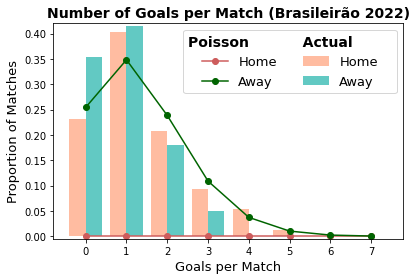

In [4]:
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(i, df.mean()[j]) for i in range(8)] for j in range(2)])

#plot histogram of actual goals
plt.hist(df[['HG', 'AG']].values, range(9), alpha=0.7, label=['Home', 'Away'], density=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (Brasileirão 2022)",size=14,fontweight='bold')
plt.ylim([-0.005, 0.42])
plt.tight_layout()
plt.show()

